# Обучаем новые модели

Скачиваем необходимый набор признаков:

In [1]:
import numpy as np
import pandas as pd

from hyperopt import hp

In [2]:
#!gshell download --with-id 1rI5pkdGKSEAVXbjTO3TgeGSocrubkUQl 

In [3]:
#!cp ./features_sdssdr16+psdr2+all_deacls8tr_QSO+GALAXY_20201212133711.pkl ./models/features.pkl
#!rm features_sdssdr16+psdr2+all_deacls8tr_QSO+GALAXY_20201212133711.pkl
#!ls

In [4]:
features_path = '../../models_before_aggregation_j/features.pkl'
column = 'J'
j_features = ['J']

In [5]:
features = pd.read_pickle(features_path) + j_features

In [6]:
sdss_wise = [
                'sdssdr16_u_cmodel-decals8tr_Lw1',
                'sdssdr16_u_cmodel-decals8tr_Lw2',
                'sdssdr16_g_cmodel-decals8tr_Lw1',
                'sdssdr16_g_cmodel-decals8tr_Lw2',
                'sdssdr16_r_cmodel-decals8tr_Lw1',
                'sdssdr16_r_cmodel-decals8tr_Lw2',
                'sdssdr16_i_cmodel-decals8tr_Lw1',
                'sdssdr16_i_cmodel-decals8tr_Lw2',
                'sdssdr16_z_cmodel-decals8tr_Lw1',
                'sdssdr16_z_cmodel-decals8tr_Lw2' 
              ]
sdss_nwise = [
                'sdssdr16_g_cmodel-decals8tr_g',
                'sdssdr16_r_cmodel-decals8tr_r',
                'sdssdr16_z_cmodel-decals8tr_z'
]

ps_decals = [
                'psdr2_g_kron-decals8tr_Lw1',
                'psdr2_g_kron-decals8tr_Lw2',
                'psdr2_r_kron-decals8tr_Lw1',
                'psdr2_r_kron-decals8tr_Lw2',
                'psdr2_i_kron-decals8tr_Lw1',
                'psdr2_i_kron-decals8tr_Lw2',
                'psdr2_z_kron-decals8tr_Lw1',
                'psdr2_z_kron-decals8tr_Lw2',
                'psdr2_y_kron-decals8tr_Lw1',
                'psdr2_y_kron-decals8tr_Lw2'
]


In [7]:
sdss = [i for i in features if 'sdss' in i and 'decals' not in i and column not in i] 
decals = [i for i in features if 'decals' in i and 'sdss' not in i and 'psdr' not in i and column not in i] 
wise = [i for i in decals if 'Lw' in i and column not in i] 
ps = [i for i in features if 'psdr' in i and 'decals' not in i and column not in i]

f0 = {"sdssdr16+wise_decals8tr": sdss+wise+sdss_wise,
     "psdr2+wise_decals8tr": ps+wise+ps_decals,
     "sdssdr16+all_decals8tr": sdss+decals+sdss_wise+sdss_nwise,
     "psdr2+all_decals8tr": ps+decals+ps_decals,
     "decals8tr": decals,
     "sdssdr16+psdr2+wise_decals8tr": sdss+ps+wise+sdss_wise+ps_decals,
     "sdssdr16+psdr2+all_decals8tr": sdss+ps+decals+ps_decals+sdss_wise+sdss_nwise}

In [8]:
features

['sdssdr16_u_psf',
 'sdssdr16_g_psf',
 'sdssdr16_r_psf',
 'sdssdr16_i_psf',
 'sdssdr16_z_psf',
 'sdssdr16_u_cmodel',
 'sdssdr16_i_cmodel',
 'sdssdr16_u-g_psf',
 'sdssdr16_u-r_psf',
 'sdssdr16_u-i_psf',
 'sdssdr16_u-z_psf',
 'sdssdr16_u_psf-cmodel',
 'sdssdr16_g-i_psf',
 'sdssdr16_g_psf-cmodel',
 'sdssdr16_r-i_psf',
 'sdssdr16_i-z_psf',
 'sdssdr16_i_psf-cmodel',
 'sdssdr16_u_cmodel-decals8tr_Lw1',
 'sdssdr16_u_cmodel-decals8tr_Lw2',
 'sdssdr16_g_cmodel-decals8tr_Lw1',
 'sdssdr16_g_cmodel-decals8tr_Lw2',
 'sdssdr16_r_cmodel-decals8tr_Lw1',
 'sdssdr16_r_cmodel-decals8tr_Lw2',
 'sdssdr16_i_cmodel-decals8tr_Lw1',
 'sdssdr16_i_cmodel-decals8tr_Lw2',
 'sdssdr16_z_cmodel-decals8tr_Lw1',
 'sdssdr16_z_cmodel-decals8tr_Lw2',
 'psdr2_i_kron',
 'psdr2_y_kron',
 'psdr2_g_psf',
 'psdr2_r_psf',
 'psdr2_i_psf',
 'psdr2_z_psf',
 'psdr2_y_psf',
 'psdr2_g-i_psf',
 'psdr2_g-y_psf',
 'psdr2_r-i_psf',
 'psdr2_r-y_psf',
 'psdr2_i-z_psf',
 'psdr2_i-y_psf',
 'psdr2_i_psf-kron',
 'psdr2_z-y_psf',
 'psdr2_y_psf-k

In [9]:
sdss_j = [
    'sdssdr16_u_psf',
     'sdssdr16_g_psf',
     'sdssdr16_r_psf',
     'sdssdr16_i_psf',
     'sdssdr16_z_psf',
     'sdssdr16_u_cmodel',
     'sdssdr16_i_cmodel'
]

ps_j = [
    'psdr2_i_kron',
     'psdr2_y_kron',
     'psdr2_g_psf',
     'psdr2_r_psf',
     'psdr2_i_psf',
     'psdr2_z_psf',
     'psdr2_y_psf'
]

wise_j = [
    'decals8tr_Lw1',
     'decals8tr_Lw2'
]

nwise_j = [
    'decals8tr_g',
     'decals8tr_r',
     'decals8tr_z'
]


l = [sdss_j, ps_j, wise_j, nwise_j]

In [10]:
'''
a = ['./data/all_j.pkl_gz']
for i in a:
    df1 = pd.read_pickle(i, compression='gzip')
    for j in l:
        for t in j:
            df1[t + str('-j')] = df1[t] - df1[column]
            
    df1.to_pickle(i[:-7]+'_agr.gz_pkl', compression='gzip')
'''

"\na = ['./data/all_j.pkl_gz']\nfor i in a:\n    df1 = pd.read_pickle(i, compression='gzip')\n    for j in l:\n        for t in j:\n            df1[t + str('-j')] = df1[t] - df1[column]\n            \n    df1.to_pickle(i[:-7]+'_agr.gz_pkl', compression='gzip')\n"

In [11]:
sdss_j = [
    'sdssdr16_u_psf-j',
     'sdssdr16_g_psf-j',
     'sdssdr16_r_psf-j',
     'sdssdr16_i_psf-j',
     'sdssdr16_z_psf-j',
     'sdssdr16_u_cmodel-j',
     'sdssdr16_i_cmodel-j'
]

ps_j = [
    'psdr2_i_kron-j',
     'psdr2_y_kron-j',
     'psdr2_g_psf-j',
     'psdr2_r_psf-j',
     'psdr2_i_psf-j',
     'psdr2_z_psf-j',
     'psdr2_y_psf-j'
]

wise_j = [
    'decals8tr_Lw1-j',
     'decals8tr_Lw2-j'
]

nwise_j = [
    'decals8tr_g-j',
     'decals8tr_r-j',
     'decals8tr_z-j'
]


l = [sdss_j, ps_j, wise_j, nwise_j]

In [12]:
f1 = {"sdssdr16+wise_decals8tr": sdss+wise+sdss_wise+sdss_j+wise_j+j_features,
     "psdr2+wise_decals8tr": ps+wise+ps_decals+ps_j+wise_j+j_features,
     "sdssdr16+all_decals8tr": sdss+decals+sdss_wise+sdss_nwise+sdss_j+wise_j+nwise_j+j_features,
     "psdr2+all_decals8tr": ps+decals+ps_decals+ps_j+wise_j+nwise_j+j_features,
     "decals8tr": decals+wise_j+nwise_j+j_features,
     "sdssdr16+psdr2+wise_decals8tr": sdss+ps+wise+sdss_wise+ps_decals+ps_j+wise_j+sdss_j+j_features,
     "sdssdr16+psdr2+all_decals8tr": sdss+ps+decals+ps_decals+sdss_wise+sdss_nwise+sdss_j+nwise_j+ps_j+wise_j+j_features}

f={'not_j': f0, 'j':f1}

Основные команды для обучения модлей: 

In [13]:
def data_preparation(X, y, c=10000, test_size = 0.8):

    X1_train, X1_test, y1_train, y1_test = train_test_split(X[y==1], y[y==1], test_size=test_size, random_state = 43)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X[y==2], y[y==2], test_size=test_size, random_state = 43)
    X3_train, X3_test, y3_train, y3_test = train_test_split(X[y==3], y[y==3], test_size=test_size, random_state = 43)
    
    count = c
    count1 = c

    X_train, X_test = np.concatenate((X1_train[:count], X2_train[:count], X3_train[:count])), np.concatenate((X1_test[:count1], X2_test[:count1], X3_test[:count1]))
    y_train, y_test = np.concatenate((y1_train[:count], y2_train[:count], y3_train[:count])), np.concatenate((y1_test[:count1], y2_test[:count1], y3_test[:count1]))

    data = np.concatenate((X_train, y_train.reshape((len(y_train), 1))), axis=1)
    np.random.shuffle(data)

    datat = np.concatenate((X_test, y_test.reshape((len(y_test), 1))), axis=1)
    np.random.shuffle(datat)
    

    return data, datat

In [14]:
def data_preparation_bin(X, y, c=10000, test_size = 0.8):

    X1_train, X1_test, y1_train, y1_test = train_test_split(X[y==1], y[y==1], test_size=test_size, random_state = 43) if  len(y[y==1]) > 0 else ([], [], [], [])
    X2_train, X2_test, y2_train, y2_test = train_test_split(X[y==2], y[y==2], test_size=test_size, random_state = 43) if  len(y[y==2]) > 0 else ([], [], [], [])
    #X3_train, X3_test, y3_train, y3_test = train_test_split(X[y==3], y[y==3], test_size=test_size, random_state = 43) if  len(y[y==3]) > 0 else ([[]*X.shape[1]], [[]*X.shape[1]], [[]], [[]])
    
    count = c
    count1 = c

    X_train, X_test = np.concatenate((X1_train[:count], X2_train[:count])), np.concatenate((X1_test[:count1], X2_test[:count1]))
    y_train, y_test = np.concatenate((y1_train[:count], y2_train[:count])), np.concatenate((y1_test[:count1], y2_test[:count1]))

    data = np.concatenate((X_train, y_train.reshape((len(y_train), 1))), axis=1)
    np.random.shuffle(data)

    datat = np.concatenate((X_test, y_test.reshape((len(y_test), 1))), axis=1)
    np.random.shuffle(datat)
    

    return data, datat

In [15]:
def data_open(path, features):
    classes = {'STAR': 1, 'QSO':2, 'GALAXY':3}
    with gzip.open(path, 'rb') as f:
        df = pickle.load(f)
    df = df[features + ['class']].dropna()
    X = df[features].values
    y = df.replace({'class':classes}, inplace = True)['class'].values
    return X, y

In [16]:
def scor(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

lgb_reg_params = {
    'min_child_samples':hp.randint('min_child_samples', 80)+1,
    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1),
    'num_leaves' :      hp.randint('num_leaves', 100)+10,
    #'min_child_weight': hp.uniform('min_child_weight', 0.001, 0.99),
    'bagging_freq':     hp.randint('bagging_freq', 20),
    'n_estimators':     1000
}
lgb_fit_params = {
    'early_stopping_rounds': 50,
    'verbose': False
}
lgb_para = dict()
lgb_para['reg_params'] = lgb_reg_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['score'] = lambda y, pred: -accuracy_score(y, pred)


rf_reg_params = {
    'min_samples_leaf': hp.randint('min_samples_leaf', 20)+1,
    'min_samples_split':hp.uniform('min_samples_split', 0.001, 0.1),
    #'max_features':     hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
    #'learning_rate':    hp.uniform('learning_rate', 0.001, 0.1),
    'n_estimators':     hp.randint('n_estimators', 800)+100
}
rf_fit_params = {
}
rf_para = dict()
rf_para['reg_params'] = rf_reg_params
rf_para['fit_params'] = rf_fit_params
rf_para['score'] = lambda y, pred: -accuracy_score(y, pred)

In [17]:
class HPOpt(object):

    def __init__(self, X, y, cv=3):
        self.X = X
        self.y = y
        self.cv = cv
        #print('init')

    def process(self, fn_name, space, trials, algo, max_evals):
        #print('in process')
        fn = getattr(self, fn_name)
        try:
            #print('try')
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
            #print('i can')
        except Exception as e:
            print({'status': STATUS_FAIL,
                    'exception': str(e)})
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def rf_reg(self, para):
        reg = RandomForestClassifier(**para['reg_params'])
        return self.train_reg(reg, para)

    def lgb_reg(self, para):
        reg = lgb.LGBMClassifier(**para['reg_params'])
        if self.cv>1:
            return self.train_cv_gb(reg, para)
        return self.train_reg(reg, para)


    def train_reg(self, reg, para):
        if len(para['fit_params'])>0:
            #print('start')
            reg.fit(self.X, self.y,
                  eval_set=[(self.X, self.y), (self.X, self.y)],
                  **para['fit_params'])
        else:
            reg.fit(self.X, self.y)
        pred = reg.predict(self.X)
        loss = para['score'](self.y, pred)
        return {'loss': loss, 'status': STATUS_OK}


    def train_cv_gb(self, reg, para):
        kf = KFold(n_splits=self.cv, shuffle=False)
        loss = 0 
        for train, test in kf.split(self.X):
            #print('start', type(train[0]), type(test[0]), type(self.y[0]), type(self.X))
            if len(para['fit_params'])>0:
                reg = lgb.LGBMClassifier(**para['reg_params'])
                reg.fit(self.X[train], self.y[train],
                      eval_set=[(self.X[train], self.y[train]), (self.X[test], self.y[test])],
                      **para['fit_params'])
            else:
                reg.fit(self.X[train], self.y[train])
            #print('pred')
            pred = reg.predict(self.X[test])
            score = para['score'](self.y[test], pred)
            loss += score

        loss=loss/self.cv
        return {'loss': loss, 'status': STATUS_OK}

In [17]:
df = pd.read_pickle('./data/all_j_agr.gz_pkl', compression='gzip')
classes = {'STAR': 1, 'QSO':2, 'GALAXY':3}
df.replace({'class':classes}, inplace = True)
df = df.drop_duplicates(subset=['nrow', 'ra', 'dec'])

KeyboardInterrupt: 

In [40]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import joblib
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

import lightgbm as lgb
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials

from time import time

In [ ]:
acc = pd.DataFrame(index=['not_j', 'j'])

In [26]:
a = '''
zoo_best-x1a_z_pdf
zoo_best-x1a_z_max
zoo_best-x1a_z_maxConf
zoo_best-x1a_z_max_DL_cm
zoo_best-x1a_z_max_Lx
zoo_best-x1a_z_max_Lx_err
zoo_best-x1a_ci1a_68
zoo_best-x1a_ci1b_68
zoo_best-x1a_ci1a_68_DL_cm
zoo_best-x1a_ci1b_68_DL_cm
zoo_best-x1a_ci1a_68_Lx
zoo_best-x1a_ci1b_68_Lx
zoo_best-x1a_ci1a_68_Lx_err
zoo_best-x1a_ci1b_68_Lx_err
zoo_best-x1a_ci1a_90
zoo_best-x1a_ci1b_90
zoo_best-x1a_ci1a_90_DL_cm
zoo_best-x1a_ci1b_90_DL_cm
zoo_best-x1a_ci1a_90_Lx
zoo_best-x1a_ci1b_90_Lx
zoo_best-x1a_ci1a_90_Lx_err
zoo_best-x1a_ci1b_90_Lx_err
zoo_best-x1a_ci1a_95
zoo_best-x1a_ci1b_95
zoo_best-x1a_ci1a_95_DL_cm
zoo_best-x1a_ci1b_95_DL_cm
zoo_best-x1a_ci1a_95_Lx
zoo_best-x1a_ci1b_95_Lx
zoo_best-x1a_ci1a_95_Lx_err
zoo_best-x1a_ci1b_95_Lx_err
'''
a = a.split('\n')[1:-1]

b = '''
zoo_best-x1cv2_0_z_pdf
zoo_best-x1cv2_0_z_max
zoo_best-x1cv2_0_z_maxConf
zoo_best-x1cv2_0_z_max_DL_cm
zoo_best-x1cv2_0_z_max_Lx
zoo_best-x1cv2_0_z_max_Lx_err
zoo_best-x1cv2_0_ci1a_68
zoo_best-x1cv2_0_ci1b_68
zoo_best-x1cv2_0_ci1a_68_DL_cm
zoo_best-x1cv2_0_ci1b_68_DL_cm
zoo_best-x1cv2_0_ci1a_68_Lx
zoo_best-x1cv2_0_ci1b_68_Lx
zoo_best-x1cv2_0_ci1a_68_Lx_err
zoo_best-x1cv2_0_ci1b_68_Lx_err
zoo_best-x1cv2_0_ci1a_90
zoo_best-x1cv2_0_ci1b_90
zoo_best-x1cv2_0_ci1a_90_DL_cm
zoo_best-x1cv2_0_ci1b_90_DL_cm
zoo_best-x1cv2_0_ci1a_90_Lx
zoo_best-x1cv2_0_ci1b_90_Lx
zoo_best-x1cv2_0_ci1a_90_Lx_err
zoo_best-x1cv2_0_ci1b_90_Lx_err
zoo_best-x1cv2_0_ci1a_95
zoo_best-x1cv2_0_ci1b_95
zoo_best-x1cv2_0_ci1a_95_DL_cm
zoo_best-x1cv2_0_ci1b_95_DL_cm
zoo_best-x1cv2_0_ci1a_95_Lx
zoo_best-x1cv2_0_ci1b_95_Lx
zoo_best-x1cv2_0_ci1a_95_Lx_err
zoo_best-x1cv2_0_ci1b_95_Lx_err
'''
b = b.split('\n')[1:-1]

In [27]:
len('zoo_best-x1cv2_0')

16

In [28]:
for i in range(len(a)):
    k = a[i][:11]+a[i][12:]
    df.loc[df['class'] == 1, k] = df.loc[df['class'] == 1, a[i]]
    df.loc[(df['class'] != 1) & (df['fold'] == 0), k] = df.loc[(df['class'] != 1) & (df['fold'] == 0), b[i]]
    df.loc[(df['class'] != 1) & (df['fold'] == 1), k] = df.loc[(df['class'] != 1) & (df['fold'] == 1), b[i][:15]+'1'+b[i][16:]]
    
    
df

,nrow,objID,ra,dec,zspec,zspec_conf,zspec_source,class,subclass,class1,...,zoo_best-x1_ci1a_90_Lx_err,zoo_best-x1_ci1b_90_Lx_err,zoo_best-x1_ci1a_95,zoo_best-x1_ci1b_95,zoo_best-x1_ci1a_95_DL_cm,zoo_best-x1_ci1b_95_DL_cm,zoo_best-x1_ci1a_95_Lx,zoo_best-x1_ci1b_95_Lx,zoo_best-x1_ci1a_95_Lx_err,zoo_best-x1_ci1b_95_Lx_err
0,765558,166771828504836546,182.850396,48.979910,0.046132,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.023962,0.026538,NaN,NaN,NaN,NaN,NaN,NaN
1,295976,140921926169192374,192.616971,27.434890,0.021385,-999.0,SDSS,3,BROADLINE,,...,NaN,NaN,-0.015042,0.014692,NaN,NaN,NaN,NaN,NaN,NaN
5,267711,153541551169831903,155.117013,37.951053,0.046178,-999.0,SDSS,3,N/A,,...,NaN,NaN,-0.023886,0.025979,NaN,NaN,NaN,NaN,NaN,NaN
6,94182,120741855100415434,185.510020,10.620819,0.025434,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.017423,0.074669,NaN,NaN,NaN,NaN,NaN,NaN
11,476230,114671598619635888,159.861973,5.562852,0.028537,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.027526,0.020971,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60414,960359,1237668503831839169,252.083230,50.783279,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.451445,0.228902,NaN,NaN,NaN,NaN,NaN,NaN
60415,960360,1237665583790752642,252.201060,50.891273,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.212508,2.934748,NaN,NaN,NaN,NaN,NaN,NaN
60416,960361,1237665584327361688,252.358160,51.708907,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.855885,1.92245,NaN,NaN,NaN,NaN,NaN,NaN
60417,960362,1237665584327164382,252.128200,52.155919,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.246795,2.79586,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.to_pickle('./data/rename_x1_class.pkl_gz', compression='gzip')

In [42]:
df = pd.read_pickle('./data/rename_x1_class.pkl_gz', compression='gzip')
df

,nrow,objID,ra,dec,zspec,zspec_conf,zspec_source,class,subclass,class1,...,zoo_best-x1_ci1a_90_Lx_err,zoo_best-x1_ci1b_90_Lx_err,zoo_best-x1_ci1a_95,zoo_best-x1_ci1b_95,zoo_best-x1_ci1a_95_DL_cm,zoo_best-x1_ci1b_95_DL_cm,zoo_best-x1_ci1a_95_Lx,zoo_best-x1_ci1b_95_Lx,zoo_best-x1_ci1a_95_Lx_err,zoo_best-x1_ci1b_95_Lx_err
0,765558,166771828504836546,182.850396,48.979910,0.046132,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.023962,0.026538,NaN,NaN,NaN,NaN,NaN,NaN
1,295976,140921926169192374,192.616971,27.434890,0.021385,-999.0,SDSS,3,BROADLINE,,...,NaN,NaN,-0.015042,0.014692,NaN,NaN,NaN,NaN,NaN,NaN
5,267711,153541551169831903,155.117013,37.951053,0.046178,-999.0,SDSS,3,N/A,,...,NaN,NaN,-0.023886,0.025979,NaN,NaN,NaN,NaN,NaN,NaN
6,94182,120741855100415434,185.510020,10.620819,0.025434,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.017423,0.074669,NaN,NaN,NaN,NaN,NaN,NaN
11,476230,114671598619635888,159.861973,5.562852,0.028537,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.027526,0.020971,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60414,960359,1237668503831839169,252.083230,50.783279,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.451445,0.228902,NaN,NaN,NaN,NaN,NaN,NaN
60415,960360,1237665583790752642,252.201060,50.891273,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.212508,2.934748,NaN,NaN,NaN,NaN,NaN,NaN
60416,960361,1237665584327361688,252.358160,51.708907,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.855885,1.92245,NaN,NaN,NaN,NaN,NaN,NaN
60417,960362,1237665584327164382,252.128200,52.155919,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.246795,2.79586,NaN,NaN,NaN,NaN,NaN,NaN


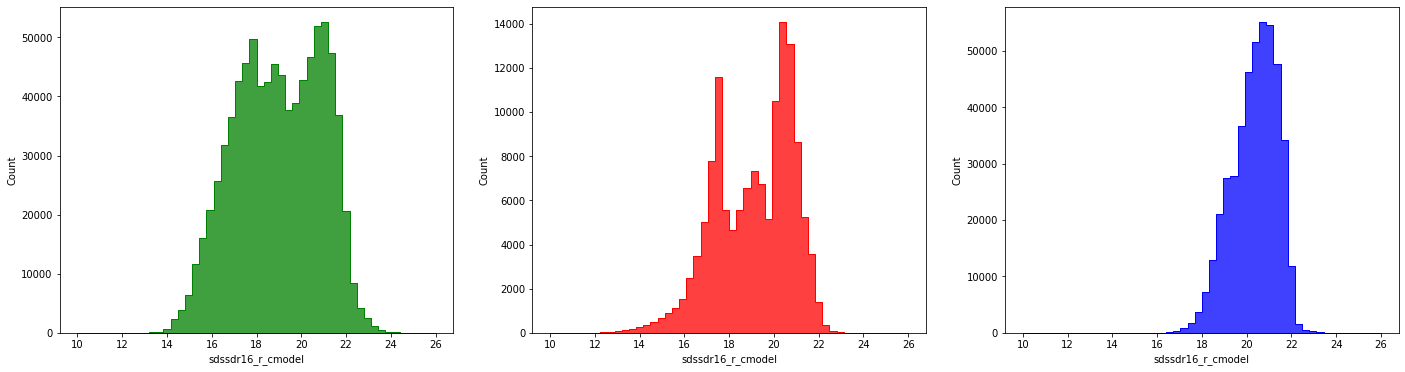

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.histplot(df[df['class']==1]['sdssdr16_r_cmodel'], ax = ax1, bins = 50, color = 'g', element="step", binrange=(10, 26))
sns.histplot(df[df['class']==3]['sdssdr16_r_cmodel'], ax = ax2, bins = 50, color = 'r', element="step", binrange=(10, 26))
sns.histplot(df[df['class']==2]['sdssdr16_r_cmodel'], ax = ax3, bins = 50, color = 'b', element="step", binrange=(10, 26))

In [44]:
def create_path(path):
    import os
    try:
        os.makedirs(path)
    except FileExistsError:
        print("Директория %s уже существует" % path) 
    except OSError:
        print ("Создать директорию %s не удалось" % path)
        return 1
    return 0

In [ ]:
variants = ['not_j', 'j']
i = 0 
for mod in variants:
    path = './big_models'+str(fold)+'/'+mod
    if create_path(path):
        raise Exception('Некуда писать')
    for overview in f[mod].keys():
        
        print(overview)
        df1 = df[f[mod][overview] + j_features*(mod == 'j')+['class']].dropna()
        X, y = df1[f[mod][overview] + j_features*(mod == 'j')].values, df1['class'].values
        data, datat = data_preparation(X, y, test_size=0.2, c=5000000)
        print(data.shape, datat.shape)

        X1, y1 = data[:, :-1], data[:, -1].astype('int')
        X2, y2 = datat[:, :-1], datat[:, -1].astype('int')
        robust = RobustScaler()

        X_train_norm = robust.fit_transform(X1)
        X_test_norm = robust.transform(X2)
        y_train = y1
        y_test = y2
        
        
        obj = HPOpt(X_train_norm, y_train, cv=3)
        lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)
        print(lgb_opt)
        gb = lgb.LGBMClassifier( 
                                    **{'colsample_bytree': lgb_opt[0]['colsample_bytree'],
                                      'min_child_samples': lgb_opt[0]['min_child_samples']+1,
                                      #'min_child_weight': lgb_opt[0]['min_child_weight'],
                                      'num_leaves': lgb_opt[0]['num_leaves']+10,
                                      'bagging_freq':lgb_opt[0]['bagging_freq'],
                                      'n_estimators': 1000
                                      }
                                  )
        t = time()
        gb.fit(X_train_norm, y_train, eval_set=[(X_train_norm, y_train), (X_test_norm, y_test)],  **lgb_fit_params)
        print('time', time()-t)
        
        
        gb_test_acc = accuracy_score(y_test, gb.predict(X_test_norm))
        print('acc', gb_test_acc)
        joblib.dump(gb, path+'/model_'+overview+'.pkl')
        joblib.dump(f[mod][overview] + j_features*(mod == 'j'), path+'/features_'+overview+'.pkl')
        joblib.dump(robust, path+'/'+overview+'_robust_for_gb.pkl')


sdssdr16+wise_decals8tr
(1150482, 31) (287622, 31)
100%|██████████| 50/50 [1:37:00<00:00, 116.41s/trial, best loss: -0.9765002842286972]
({'bagging_freq': 2, 'colsample_bytree': 0.6171440995440345, 'min_child_samples': 46, 'num_leaves': 50}, <hyperopt.base.Trials object at 0x7f62eed4dd50>)
time 29.9853355884552
acc 0.9756138264805891
psdr2+wise_decals8tr
(1049502, 30) (262378, 30)
100%|██████████| 50/50 [1:50:54<00:00, 133.08s/trial, best loss: -0.9769290577816907]  
({'bagging_freq': 19, 'colsample_bytree': 0.5165451524433049, 'min_child_samples': 55, 'num_leaves': 78}, <hyperopt.base.Trials object at 0x7f6400d79110>)
time 80.21797275543213
acc 0.977479056933127
sdssdr16+all_decals8tr
(1145051, 40) (286264, 40)
100%|██████████| 50/50 [2:01:22<00:00, 145.65s/trial, best loss: -0.9860451630614784]  
({'bagging_freq': 14, 'colsample_bytree': 0.8462424963791854, 'min_child_samples': 79, 'num_leaves': 84}, <hyperopt.base.Trials object at 0x7f63fedf3f50>)
time 100.50510144233704
acc 0.98689

In [ ]:
df

In [32]:
df_weak = {}

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



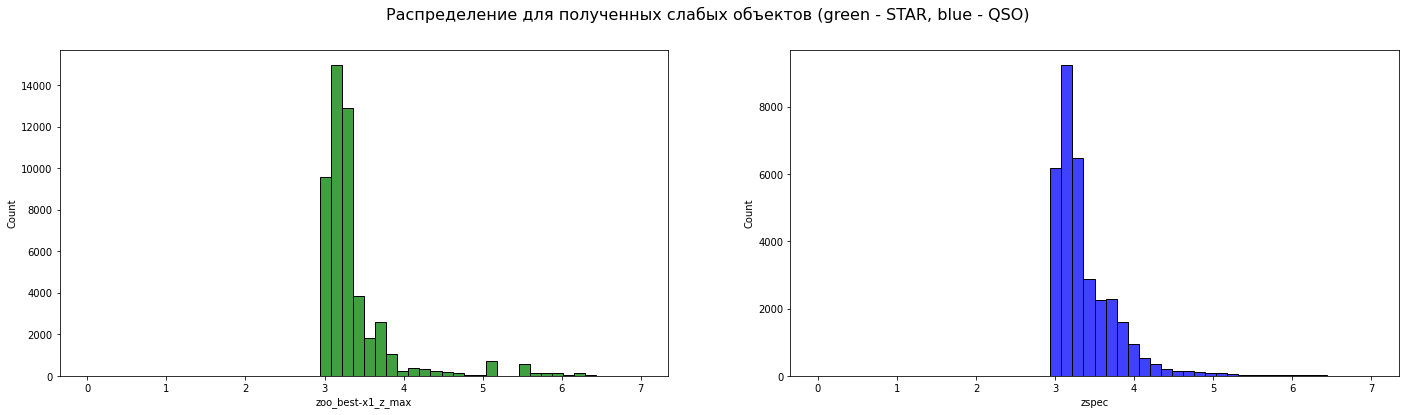

STAR 50315 
QSO 33783 
GALAXY 0


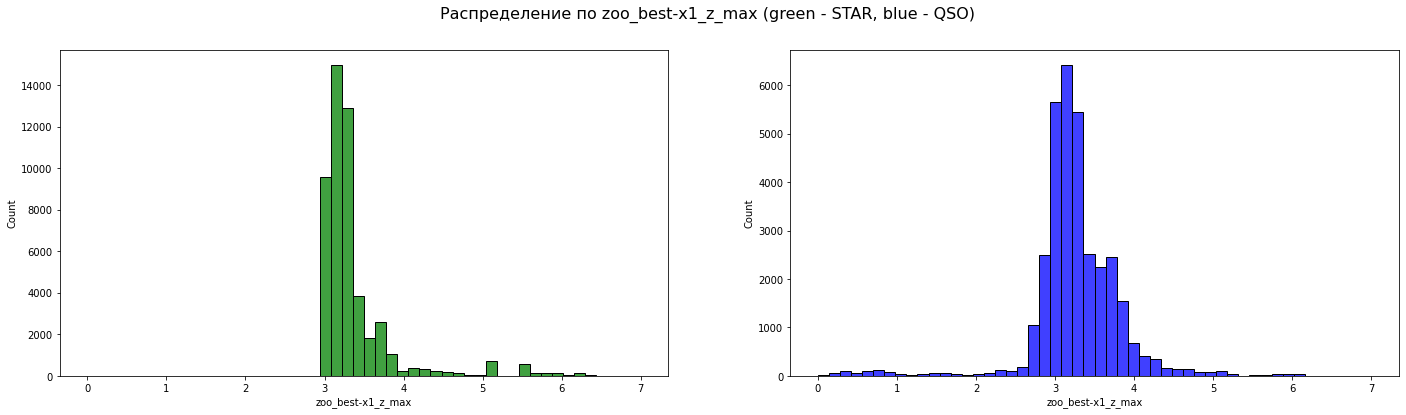

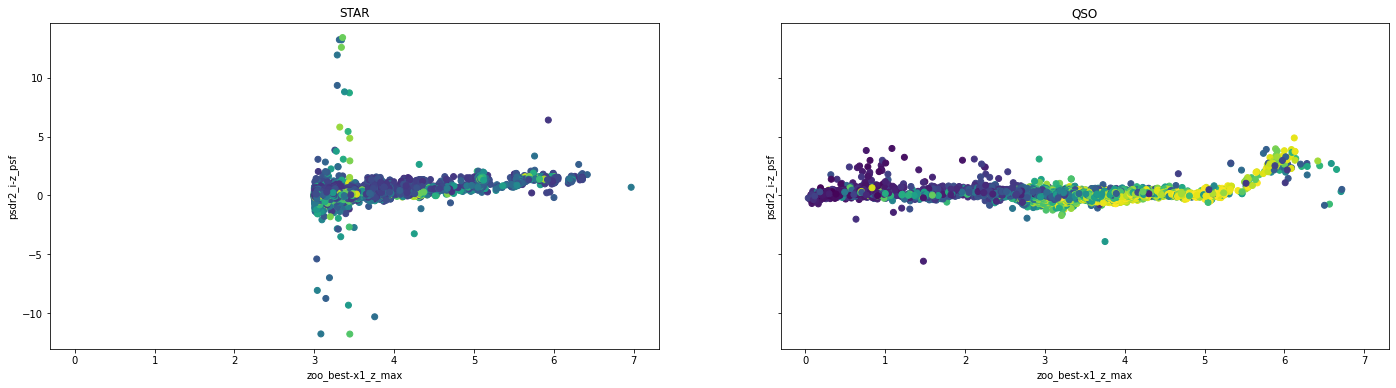

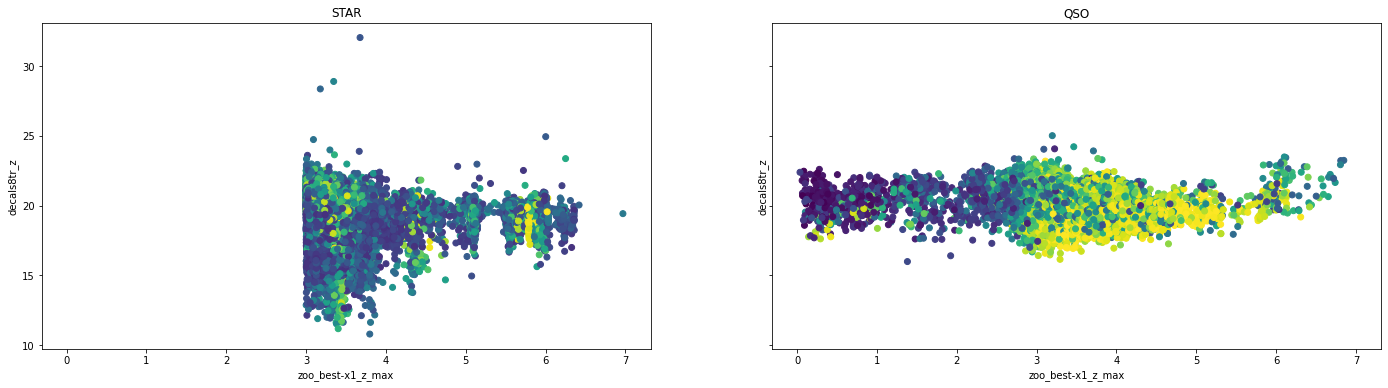

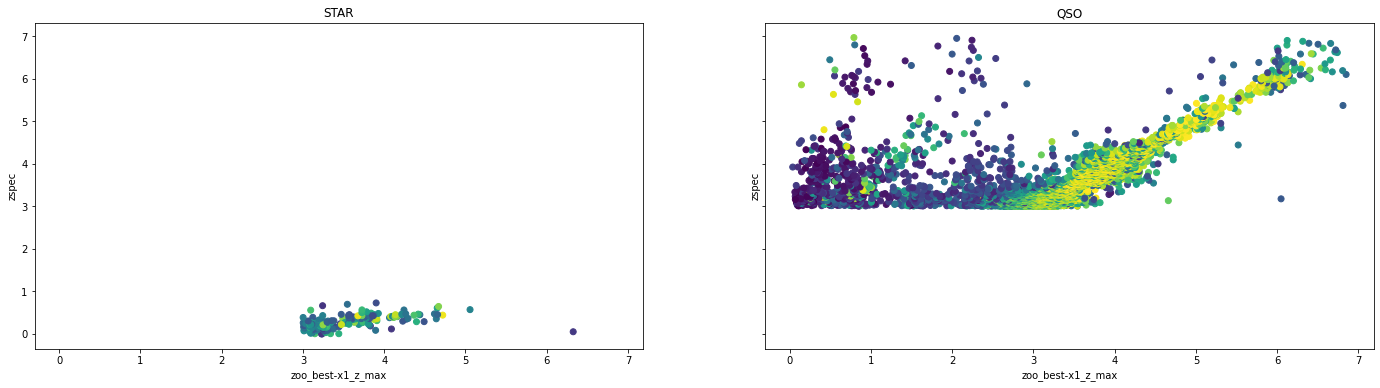

         nrow                objID          ra        dec     zspec  \
9328   198482   131932190057259165  219.005907  19.948889  0.045404   
9479   368943   119241304119489055  130.411915   9.373807  0.000239   
9681   610236   131851704557834825  170.455790  19.878579 -0.009112   
9755   692755   113791676021961937  167.602380   4.826100  0.030167   
24242   52943   172432048282463503  204.828265  53.694016  0.106581   
...       ...                  ...         ...        ...       ...   
60318  960263  1237678617420628015    6.372177   1.363077       NaN   
60340  960285  1237657628450750810  167.748040  50.564964       NaN   
60362  960307  1237665583253881608  251.800550  50.801796       NaN   
60381  960326  1237679579471282689   22.535753  30.106945       NaN   
60401  960346  1237655130908262898  238.826670  52.987401       NaN   

       zspec_conf zspec_source  class     subclass class1  ...  \
9328       -999.0         SDSS      1  STARFORMING         ...   
9479       -999

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



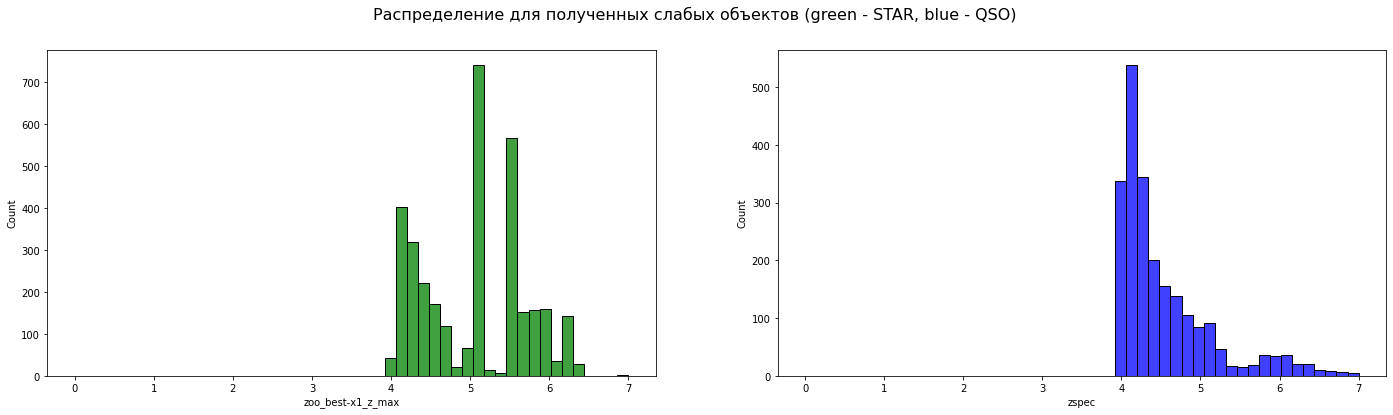

STAR 3369 
QSO 2274 
GALAXY 0


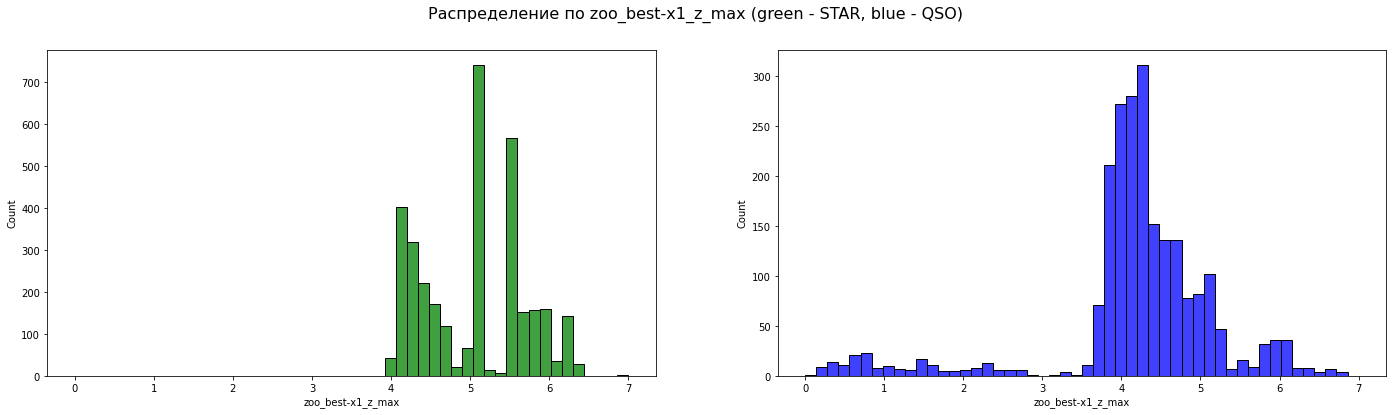

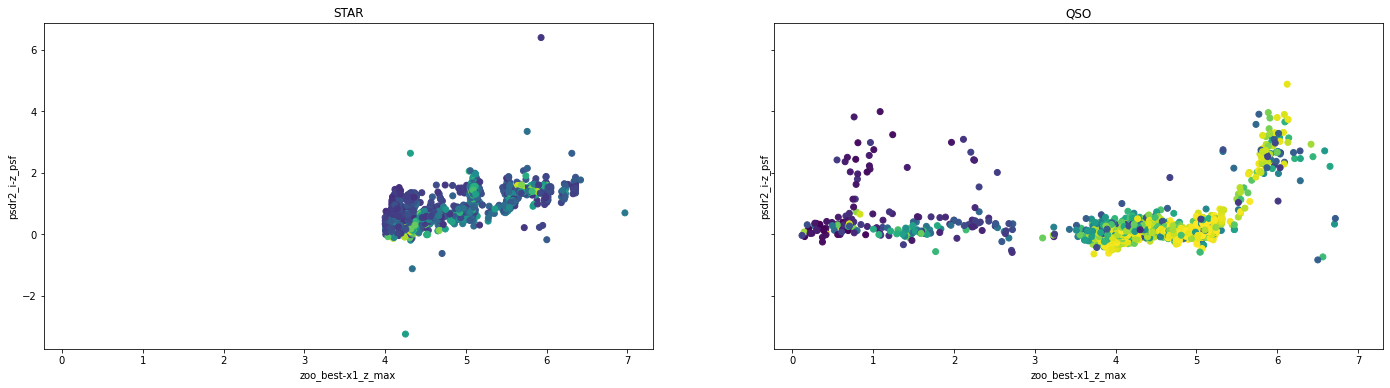

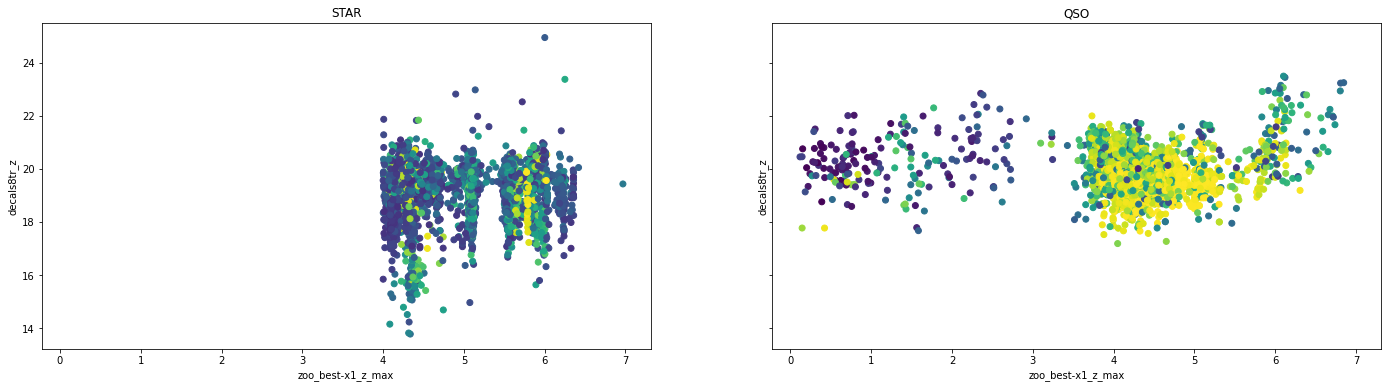

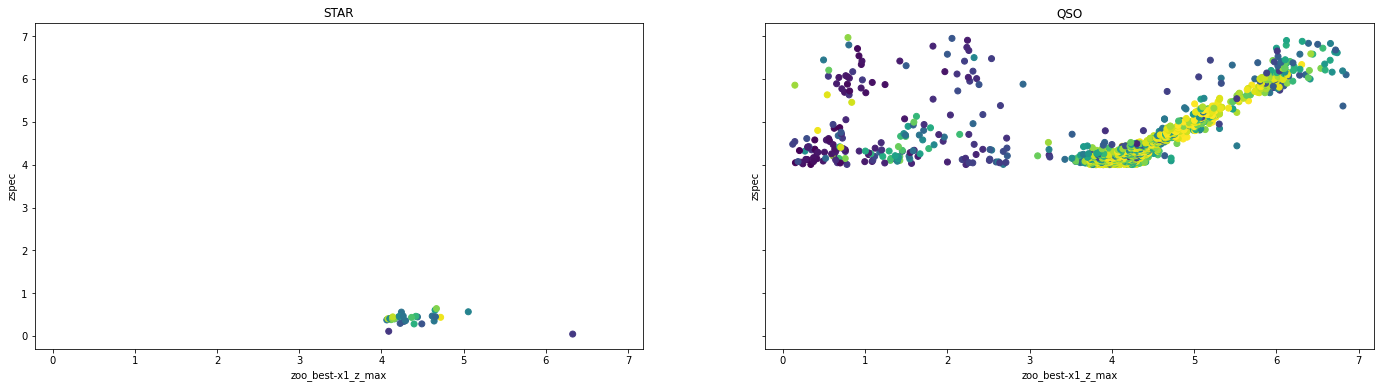

         nrow                objID          ra        dec     zspec  \
9328   198482   131932190057259165  219.005907  19.948889  0.045404   
24467  251096   169971227163908613  122.716492  51.648248  0.110732   
61958  757012   143892134369790665  213.437037  29.908491  0.341052   
62351     810                 -999  179.280177   0.719729  0.283375   
62797  413680                 -999   19.885534   3.995603  0.281807   
...       ...                  ...         ...        ...       ...   
59781  959726  1237680122785366407   11.665456  -6.745566       NaN   
59951  959896  1237679255203283401   22.788117  -4.034314       NaN   
60087  960032  1237678595948544996   12.694060   1.587782       NaN   
60207  960152  1237657628988277783  170.028870  51.210082       NaN   
60301  960246  1237680101312431074   26.947577   2.961368       NaN   

       zspec_conf zspec_source  class     subclass class1  ...  \
9328       -999.0         SDSS      1  STARFORMING         ...   
24467      -999

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



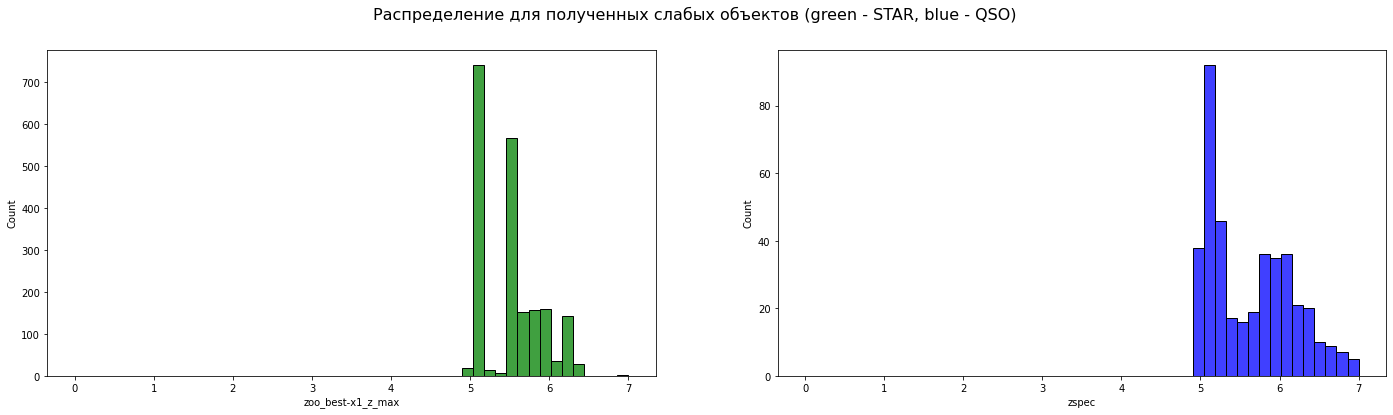

STAR 2022 
QSO 407 
GALAXY 0


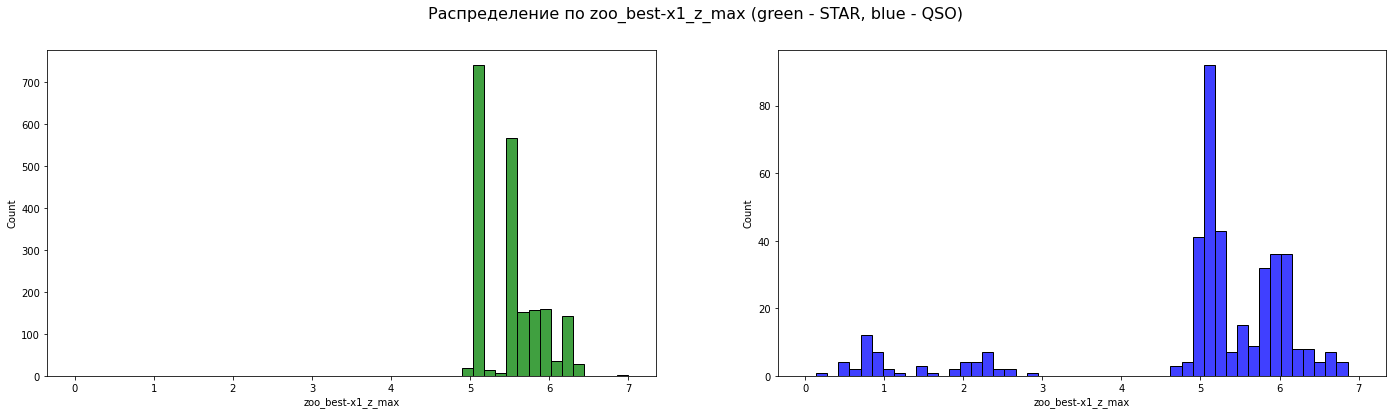

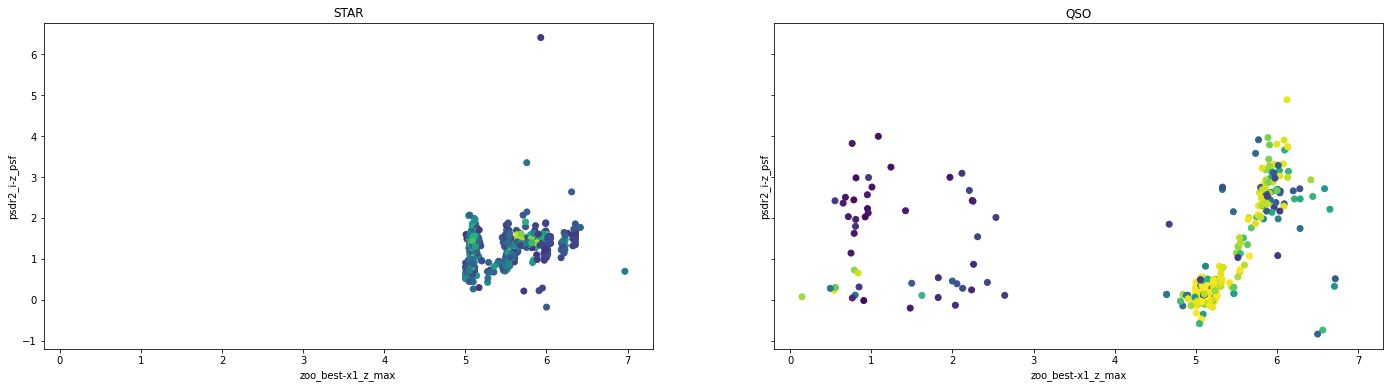

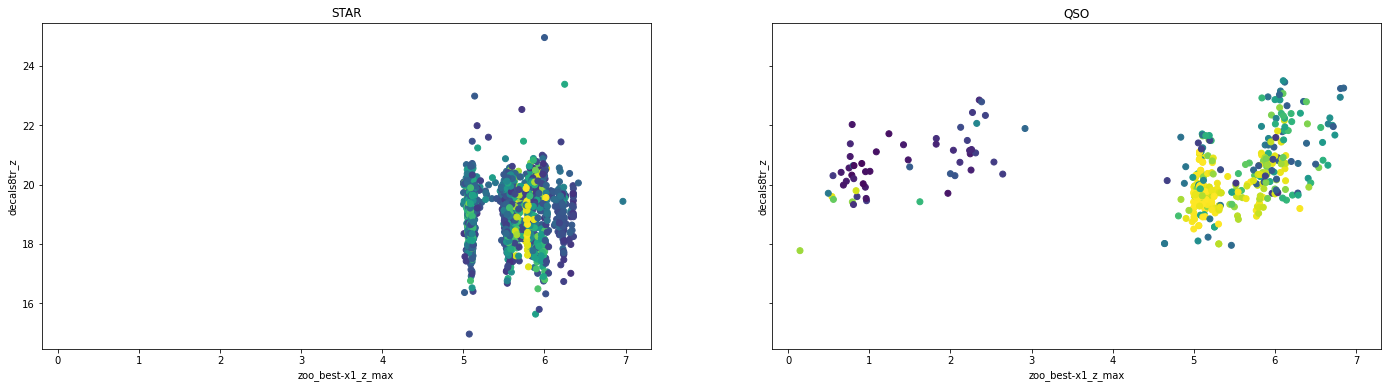

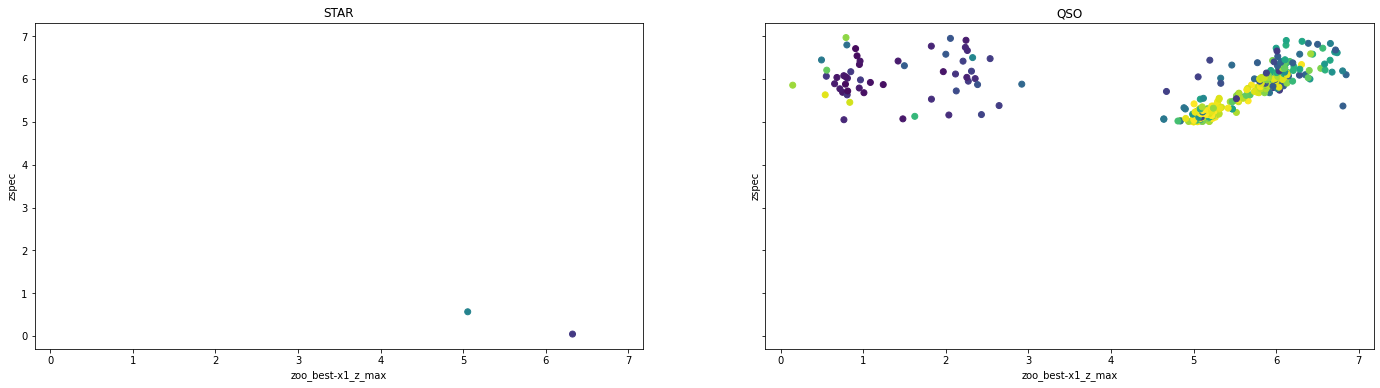

          nrow                objID          ra        dec     zspec  \
9328    198482   131932190057259165  219.005907  19.948889  0.045404   
131511  427027   143792578821209843  257.881995  29.832673  0.565843   
585757  298926   124431786030245794  178.603091  13.696020  5.005000   
585763  606730   177581722409993992  172.241006  57.986049  5.001000   
585767     480  1237661068186747894  178.603060  13.696052  5.005000   
...        ...                  ...         ...        ...       ...   
59781   959726  1237680122785366407   11.665456  -6.745566       NaN   
59951   959896  1237679255203283401   22.788117  -4.034314       NaN   
60087   960032  1237678595948544996   12.694060   1.587782       NaN   
60207   960152  1237657628988277783  170.028870  51.210082       NaN   
60301   960246  1237680101312431074   26.947577   2.961368       NaN   

        zspec_conf zspec_source  class     subclass class1  ...  \
9328        -999.0         SDSS      1  STARFORMING         ...   
1

In [37]:
for i in [3, 4, 5]:
    df_weak[i] = df.loc[((df['zoo_best-x1_z_max']>i) & 
     (df['zoo_best-x1_z_maxConf']>0.2) & (df['class'] != 2)) | ((df['class'] == 2) & (df['zspec']>i))]
    classes = {3:1}
    df_weak[i].replace({'class':classes}, inplace = True)
    report_plots(df_weak[i])
    df_weak[i].to_pickle(f'./data/{i}weak.pkl_gz', compression='gzip')
    print(df_weak[i])

In [ ]:
variants = ['not_j', 'j']
folds=[0, 1]
for weak, df in df_weak.items():
    for fold in folds:
        for mod in variants:

            path = f'{weak}weak/models'+str(fold)+'/'+mod
            if create_path(path):
                raise Exception('Некуда писать')

            for overview in f[mod].keys():
                print(overview)

                df1 = df[df['fold'] == fold] 
                df1 = df1[f[mod][overview]+['class']].dropna()
                print(len(f[mod][overview]))

                X, y = df1[f[mod][overview]].values, df1['class'].values
                data, datat = data_preparation_bin(X, y, test_size=0.2, c=500000)
                print(data.shape, datat.shape)

                X1, y1 = data[:, :-1], data[:, -1].astype('int')
                X2, y2 = datat[:, :-1], datat[:, -1].astype('int')
                robust = RobustScaler()

                X_train_norm = robust.fit_transform(X1)
                X_test_norm = robust.transform(X2)
                y_train = y1
                y_test = y2

                obj = HPOpt(X_train_norm, y_train, cv=3)
                lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)
                print(lgb_opt)
                gb = lgb.LGBMClassifier( 
                                            **{'colsample_bytree': lgb_opt[0]['colsample_bytree'],
                                              'min_child_samples': lgb_opt[0]['min_child_samples']+1,
                                              #'min_child_weight': lgb_opt[0]['min_child_weight'],
                                              'num_leaves': lgb_opt[0]['num_leaves']+10,
                                              'bagging_freq':lgb_opt[0]['bagging_freq'],
                                              'n_estimators': 1000
                                              }
                                          )
                t = time()
                gb.fit(X_train_norm, y_train, eval_set=[(X_train_norm, y_train), (X_test_norm, y_test)],  **lgb_fit_params)
                print(time()-t)
                gb_test_acc = accuracy_score(y_test, gb.predict(X_test_norm))
                #acc.loc[mod, overview] = gb_test_acc
                print(gb_test_acc)
                joblib.dump(gb, path +'/model_'+overview+'.pkl')
                joblib.dump(f[mod][overview], path +'/features_'+overview+'.pkl')
                joblib.dump(robust, path +'/'+overview+'_robust_for_gb.pkl')


Директория 3weak/models0/not_j уже существует
sdssdr16+wise_decals8tr
30
(33256, 31) (8314, 31)
100%|██████████| 50/50 [05:15<00:00,  6.32s/trial, best loss: -0.938236747932601] 
({'bagging_freq': 9, 'colsample_bytree': 0.5238552819327082, 'min_child_samples': 24, 'num_leaves': 53}, <hyperopt.base.Trials object at 0x7f63ffccc2d0>)
2.6430907249450684
0.941303824873707
psdr2+wise_decals8tr
29
(30083, 30) (7522, 30)
100%|██████████| 50/50 [04:15<00:00,  5.12s/trial, best loss: -0.9441546085110158]
({'bagging_freq': 11, 'colsample_bytree': 0.3634376790365125, 'min_child_samples': 7, 'num_leaves': 43}, <hyperopt.base.Trials object at 0x7f63ffca4090>)
2.3200392723083496
0.938447221483648
sdssdr16+all_decals8tr
39
(33029, 40) (8258, 40)
100%|██████████| 50/50 [05:42<00:00,  6.84s/trial, best loss: -0.9703593985126583]
({'bagging_freq': 2, 'colsample_bytree': 0.3629831049427087, 'min_child_samples': 43, 'num_leaves': 14}, <hyperopt.base.Trials object at 0x7f63fedf1b10>)
2.450902223587036
0.972

In [28]:
df

,nrow,objID,ra,dec,zspec,zspec_conf,zspec_source,class,subclass,class1,...,zoo_best-x1_ci1a_90_Lx_err,zoo_best-x1_ci1b_90_Lx_err,zoo_best-x1_ci1a_95,zoo_best-x1_ci1b_95,zoo_best-x1_ci1a_95_DL_cm,zoo_best-x1_ci1b_95_DL_cm,zoo_best-x1_ci1a_95_Lx,zoo_best-x1_ci1b_95_Lx,zoo_best-x1_ci1a_95_Lx_err,zoo_best-x1_ci1b_95_Lx_err
0,765558,166771828504836546,182.850396,48.979910,0.046132,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.023962,0.026538,NaN,NaN,NaN,NaN,NaN,NaN
1,295976,140921926169192374,192.616971,27.434890,0.021385,-999.0,SDSS,3,BROADLINE,,...,NaN,NaN,-0.015042,0.014692,NaN,NaN,NaN,NaN,NaN,NaN
5,267711,153541551169831903,155.117013,37.951053,0.046178,-999.0,SDSS,3,N/A,,...,NaN,NaN,-0.023886,0.025979,NaN,NaN,NaN,NaN,NaN,NaN
6,94182,120741855100415434,185.510020,10.620819,0.025434,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.017423,0.074669,NaN,NaN,NaN,NaN,NaN,NaN
11,476230,114671598619635888,159.861973,5.562852,0.028537,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.027526,0.020971,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60414,960359,1237668503831839169,252.083230,50.783279,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.451445,0.228902,NaN,NaN,NaN,NaN,NaN,NaN
60415,960360,1237665583790752642,252.201060,50.891273,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.212508,2.934748,NaN,NaN,NaN,NaN,NaN,NaN
60416,960361,1237665584327361688,252.358160,51.708907,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.855885,1.92245,NaN,NaN,NaN,NaN,NaN,NaN
60417,960362,1237665584327164382,252.128200,52.155919,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.246795,2.79586,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_weak.to_pickle('./data/weak.pkl_gz', compression='gzip')

Пора пора обучать далекие объекты

In [ ]:
df = pd.read_pickle('./data/weak.pkl_gz', compression='gzip')

In [36]:
df

,nrow,objID,ra,dec,zspec,zspec_conf,zspec_source,class,subclass,class1,...,zoo_best-x1_ci1a_90_Lx_err,zoo_best-x1_ci1b_90_Lx_err,zoo_best-x1_ci1a_95,zoo_best-x1_ci1b_95,zoo_best-x1_ci1a_95_DL_cm,zoo_best-x1_ci1b_95_DL_cm,zoo_best-x1_ci1a_95_Lx,zoo_best-x1_ci1b_95_Lx,zoo_best-x1_ci1a_95_Lx_err,zoo_best-x1_ci1b_95_Lx_err
552279,1021,114891860747492437,186.074754,5.743379,3.003,-999.0,Paris18,2,,,...,NaN,NaN,-0.40792,0.46854,NaN,NaN,NaN,NaN,NaN,NaN
552280,1650,126640267306702440,26.730700,15.534902,3.013,-999.0,Paris18,2,,,...,NaN,NaN,-0.3112,0.1022,NaN,NaN,NaN,NaN,NaN,NaN
552282,1768,171752025048044549,202.505046,53.128304,3.020,-999.0,Paris18,2,,,...,NaN,NaN,-1.762617,0.381325,NaN,NaN,NaN,NaN,NaN,NaN
552283,1809,137112187008492695,218.700891,24.260088,3.011,-999.0,Paris18,2,,,...,NaN,NaN,-0.319,0.26408,NaN,NaN,NaN,NaN,NaN,NaN
552284,2022,111303287981785562,328.798176,2.754261,3.012,-999.0,Paris18,2,,,...,NaN,NaN,-0.160727,0.216999,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60318,960263,1237678617420628015,6.372177,1.363077,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-2.730689,1.53531,NaN,NaN,NaN,NaN,NaN,NaN
60340,960285,1237657628450750810,167.748040,50.564964,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-2.96547,0.383744,NaN,NaN,NaN,NaN,NaN,NaN
60362,960307,1237665583253881608,251.800550,50.801796,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.679388,0.211186,NaN,NaN,NaN,NaN,NaN,NaN
60381,960326,1237679579471282689,22.535753,30.106945,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-3.302376,0.350595,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

%matplotlib inline

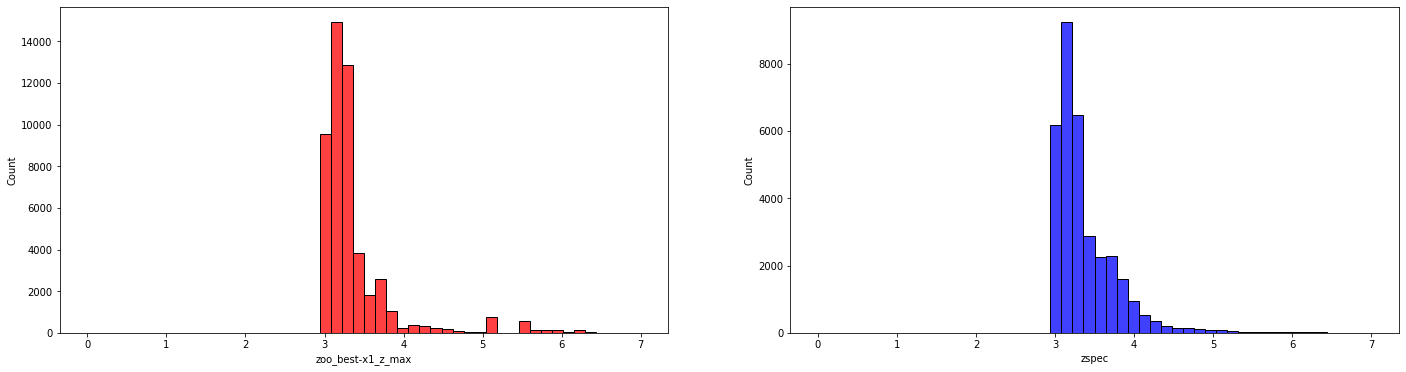

In [56]:
fig, ( ax2, ax3) = plt.subplots(ncols = 2, figsize = (24, 6))
sns.histplot(df[df['class']==1]['zoo_best-x1_z_max'], ax = ax2, bins = 50, color = 'r', binrange=(0, 7) )
sns.histplot(df[df['class']==2]['zspec'], ax = ax3, bins = 50, color = 'b', binrange=(0, 7) )

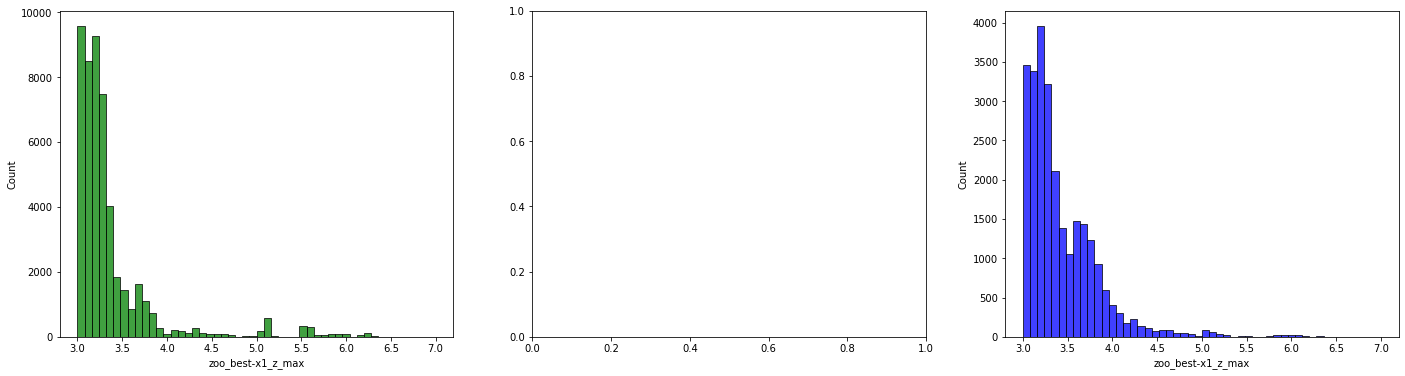

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.histplot(df[df['class']==1]['zoo_best-x1_z_max'], ax = ax1, bins = 50, color = 'g', binrange=(0, 7) )
sns.histplot(df[df['class']==3]['zoo_best-x1_z_max'], ax = ax2, bins = 50, color = 'r', binrange=(0, 7) )
sns.histplot(df[df['class']==2]['zoo_best-x1_z_max'], ax = ax3, bins = 50, color = 'b', binrange=(0, 7) )

In [39]:
sum(df['class']==1), sum(df['class']==2), sum(df['class']==3)

(50125, 33783, 0)

In [40]:
df0 = df.loc[ (df['zoo_best-x1_z_max']>5) & 
 (df['zoo_best-x1_z_maxConf']>0.2)]

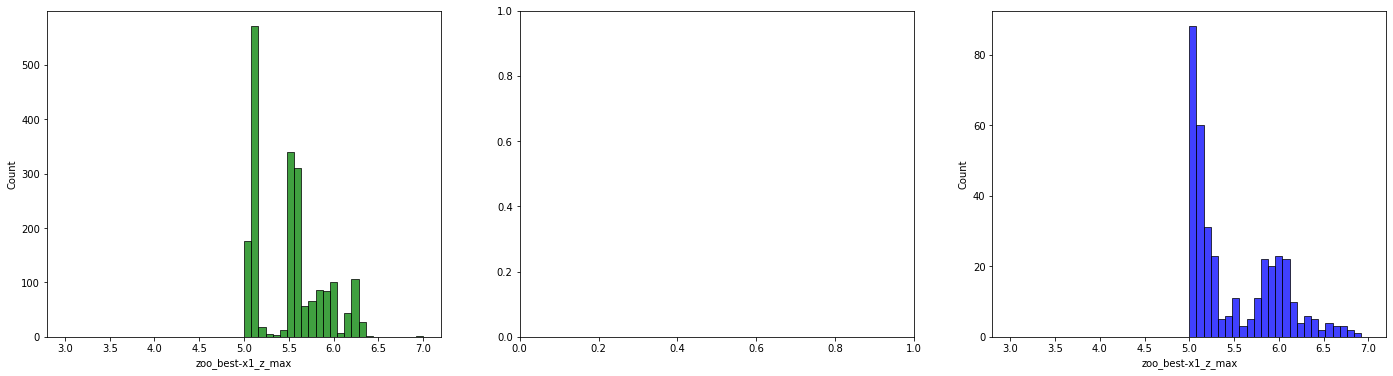

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.histplot(df0[df0['class']==1]['zoo_best-x1_z_max'], ax = ax1, bins = 50, color = 'g', binrange=(0, 7) )
sns.histplot(df0[df0['class']==3]['zoo_best-x1_z_max'], ax = ax2, bins = 50, color = 'r', binrange=(0, 7) )
sns.histplot(df0[df0['class']==2]['zoo_best-x1_z_max'], ax = ax3, bins = 50, color = 'b', binrange=(0, 7) )

In [42]:
sum(df0['class']==1), sum(df0['class']==2), sum(df0['class']==3)

(2020, 370, 0)

In [43]:
df0 = df.loc[ (df['zoo_best-x1_z_max']>5) & 
 (df['zoo_best-x1_z_maxConf']>0.2) & (df['J'] >= 0)]

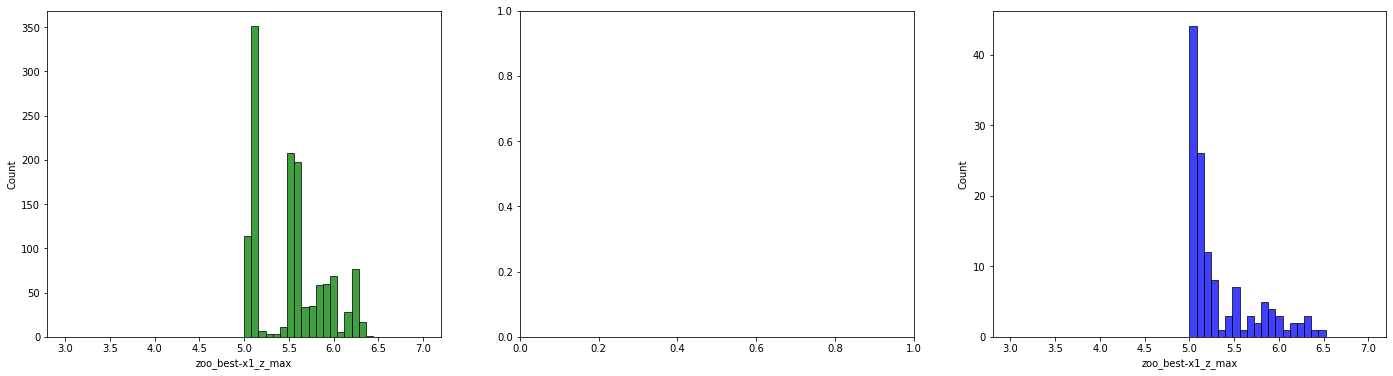

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.histplot(df0[df0['class']==1]['zoo_best-x1_z_max'], ax = ax1, bins = 50, color = 'g', binrange=(0, 7) )
sns.histplot(df0[df0['class']==3]['zoo_best-x1_z_max'], ax = ax2, bins = 50, color = 'r', binrange=(0, 7) )
sns.histplot(df0[df0['class']==2]['zoo_best-x1_z_max'], ax = ax3, bins = 50, color = 'b', binrange=(0, 7) )

In [45]:
sum(df0['class']==1), sum(df0['class']==2), sum(df0['class']==3)

(1280, 129, 0)

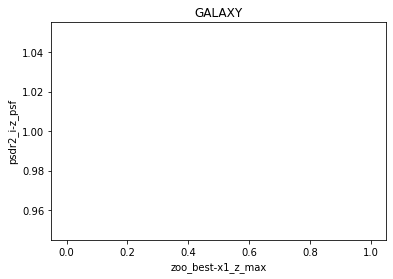

In [46]:
from matplotlib import colors
CLASS = {1:'STAR', 2:'QSO', 3:'GALAXY'}
cls = 3
p = df.loc[df['class'] == cls]
x = 'zoo_best-x1_z_max'
y = 'psdr2_i-z_psf'
norm = colors.Normalize(vmin=np.min(p['zoo_best-x1_z_maxConf']), vmax=np.max(p['zoo_best-x1_z_maxConf']))

plt.title(CLASS[cls])
plt.xlabel(x)
plt.ylabel(y)
plt.scatter([0, 0.5, 1],[1, 1, 1], c=[0, 0.5, 1], norm=norm)
#plt.plot(p[x],p[y], 'ro', c=p['zoo_best-x1_z_maxConf'])
plt.show()

In [47]:
def plotik(cls, x, y):
    CLASS = {1:'STAR', 2:'QSO', 3:'GALAXY'}
    p = df.loc[df['class'] == cls]
    norm = colors.Normalize(vmin=np.min(p['zoo_best-x1_z_maxConf']), vmax=np.max(p['zoo_best-x1_z_maxConf']))
    plt.title(CLASS[cls])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(p[x],p[y], c=p['zoo_best-x1_z_maxConf'], norm=norm)
    plt.show()

In [48]:
def plotishe(df, x, y):
    CLASS = {1:'STAR', 2:'QSO', 3:'GALAXY'}
    f, axes = plt.subplots(ncols = 3, figsize=(15, 5), sharex=True, sharey = True)
    for cls in CLASS.keys():
        p = df.loc[df['class'] == cls]
        norm = colors.Normalize(vmin=np.min(p['zoo_best-x1_z_maxConf']), vmax=np.max(p['zoo_best-x1_z_maxConf']))
        axes[cls-1].set_title(CLASS[cls])
        axes[cls-1].set_xlabel(x)
        axes[cls-1].set_ylabel(y)
        axes[cls-1].scatter(p[x],p[y], c=p['zoo_best-x1_z_maxConf'], norm=norm)
        
    plt.show()

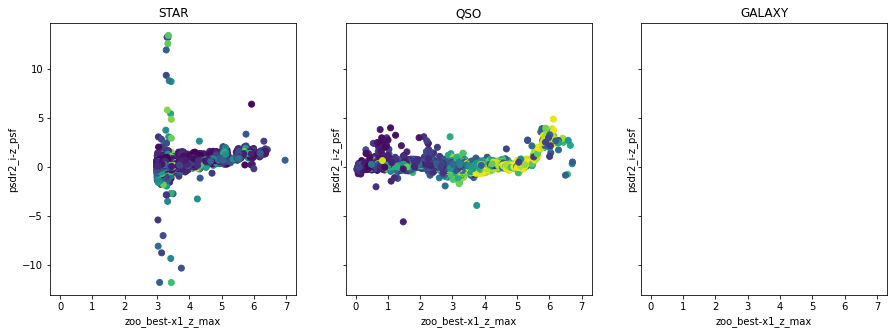

In [49]:
plotishe('zoo_best-x1_z_max', 'psdr2_i-z_psf')

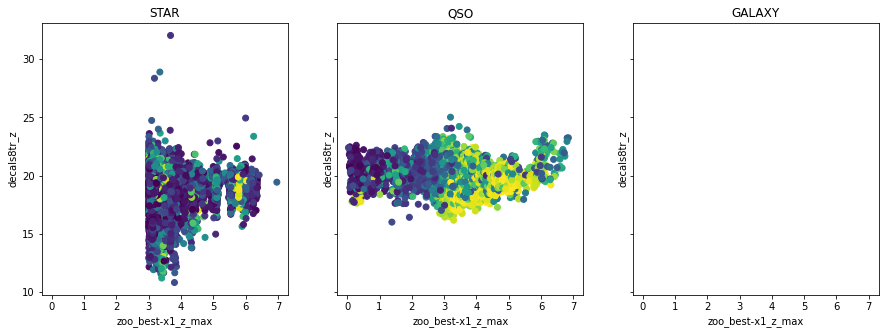

In [50]:
plotishe('zoo_best-x1_z_max', 'decals8tr_z')

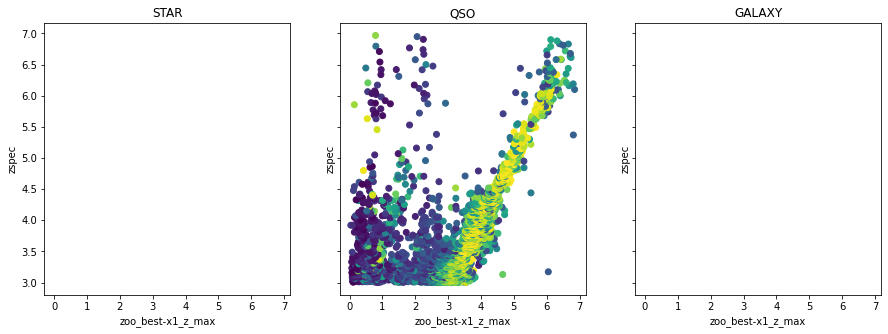

In [51]:
plotishe('zoo_best-x1_z_max', 'zspec')

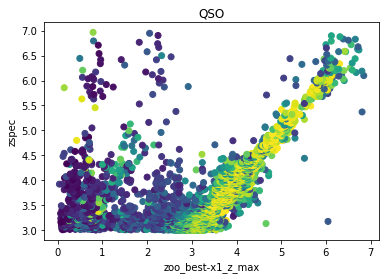

In [52]:
plotik(2, 'zoo_best-x1_z_max', 'zspec')

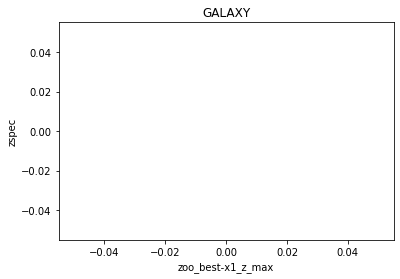

In [53]:
plotik(3, 'zoo_best-x1_z_max', 'zspec')

In [ ]:
acc

In [23]:
f[mod].keys()

dict_keys(['sdssdr16+wise_decals8tr', 'psdr2+wise_decals8tr', 'sdssdr16+all_decals8tr', 'psdr2+all_decals8tr', 'decals8tr', 'sdssdr16+psdr2+wise_decals8tr', 'sdssdr16+psdr2+all_decals8tr'])

In [36]:
def report_plots(df):
    from matplotlib import colors
    fig, ( ax2, ax3) = plt.subplots(ncols = 2, figsize = (24, 6))
    sns.histplot(df[df['class']==1]['zoo_best-x1_z_max'], ax = ax2, bins = 50, color = 'g', binrange=(0, 7) )
    sns.histplot(df[df['class']==2]['zspec'], ax = ax3, bins = 50, color = 'b', binrange=(0, 7) )
    fig.suptitle('Распределение для полученных слабых объектов (green - STAR, blue - QSO)', fontsize=16)
    plt.show()
    print('STAR', sum(df['class']==1), '\nQSO', sum(df['class']==2), '\nGALAXY', sum(df['class']==3))

    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (24, 6))
    sns.histplot(df[df['class']==1]['zoo_best-x1_z_max'], ax = ax1, bins = 50, color = 'g', binrange=(0, 7) )
    sns.histplot(df[df['class']==2]['zoo_best-x1_z_max'], ax = ax2, bins = 50, color = 'b', binrange=(0, 7) )

    fig.suptitle('Распределение по zoo_best-x1_z_max (green - STAR, blue - QSO)', fontsize=16)
    plt.show()
    
    def plotishe(df, x, y, normal=None):
        CLASS = {1:'STAR', 2:'QSO'}
        f, axes = plt.subplots(ncols = 2, figsize=(24, 6), sharex=True, sharey = True)
        for cls in CLASS.keys():
            p = df.loc[df['class'] == cls]
            if normal is None:
                normal = []
            norm = colors.Normalize(vmin=normal[0], vmax=normal[1])
            axes[cls-1].set_title(CLASS[cls])
            axes[cls-1].set_xlabel(x)
            axes[cls-1].set_ylabel(y)
            axes[cls-1].scatter(p[x],p[y], c=p['zoo_best-x1_z_maxConf'], norm=norm)

        plt.show()
    normal = [0.07196959430644186, 1.0000000000000002]
    plotishe(df, 'zoo_best-x1_z_max', 'psdr2_i-z_psf', normal)
    plotishe(df, 'zoo_best-x1_z_max', 'decals8tr_z', normal)
    plotishe(df, 'zoo_best-x1_z_max', 'zspec', normal)
    
    

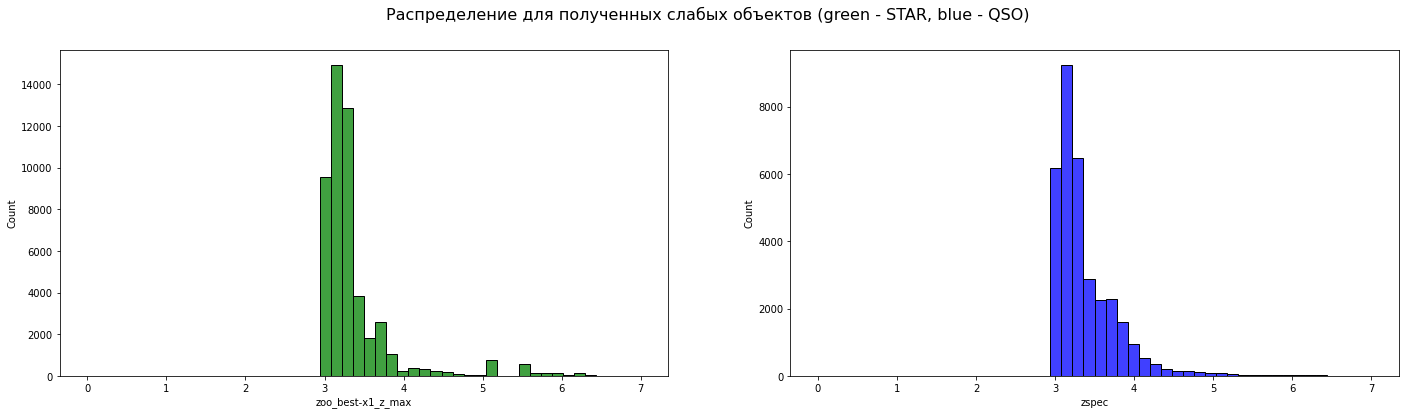

STAR 50125 
QSO 33783 
GALAXY 0


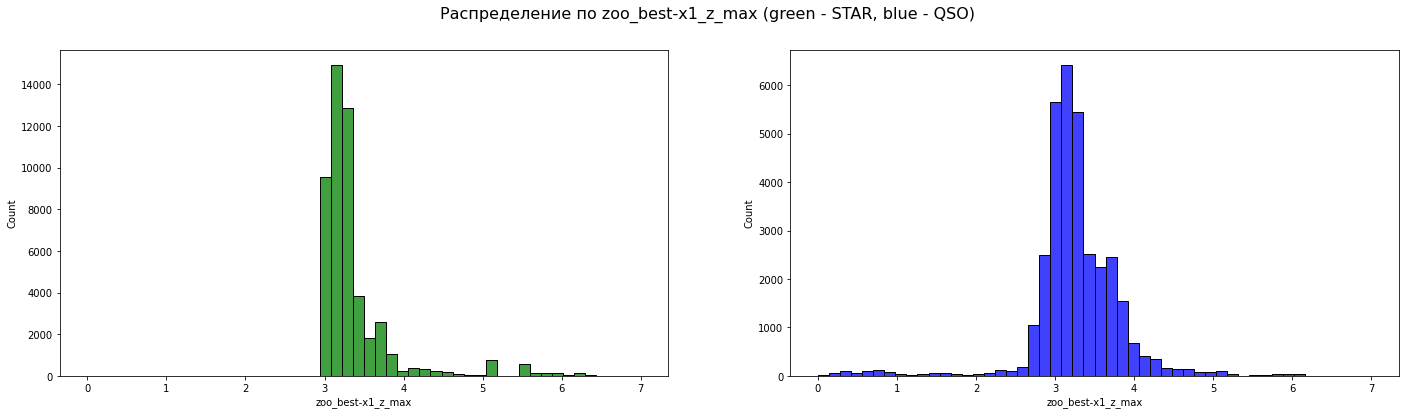

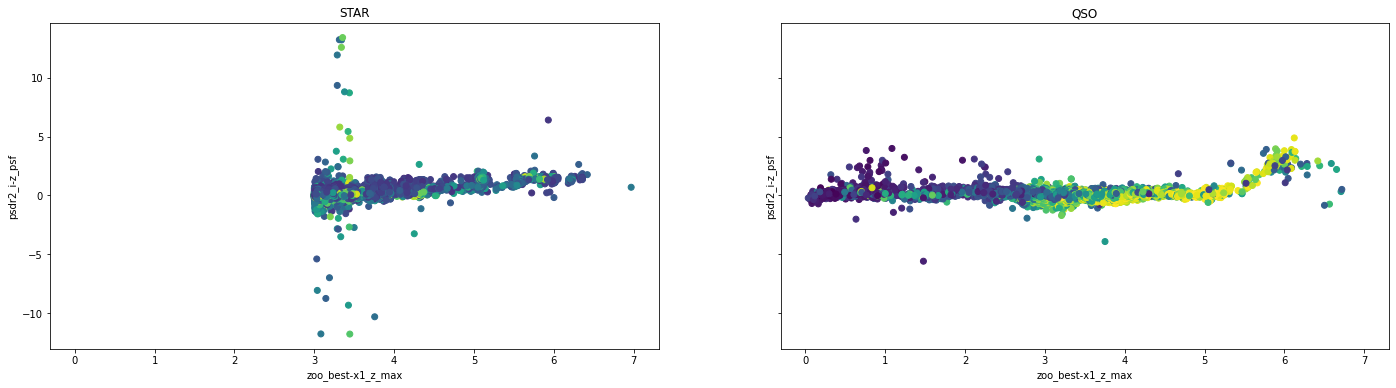

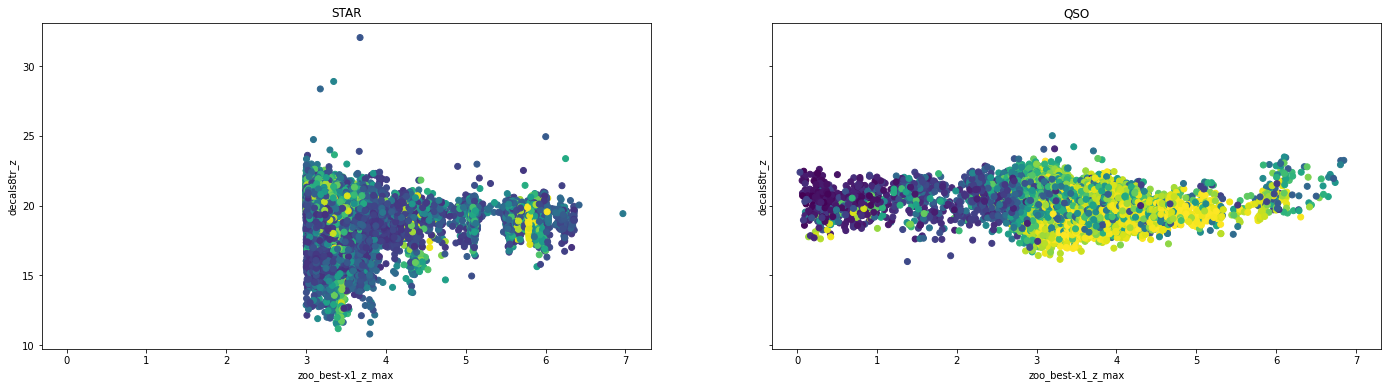

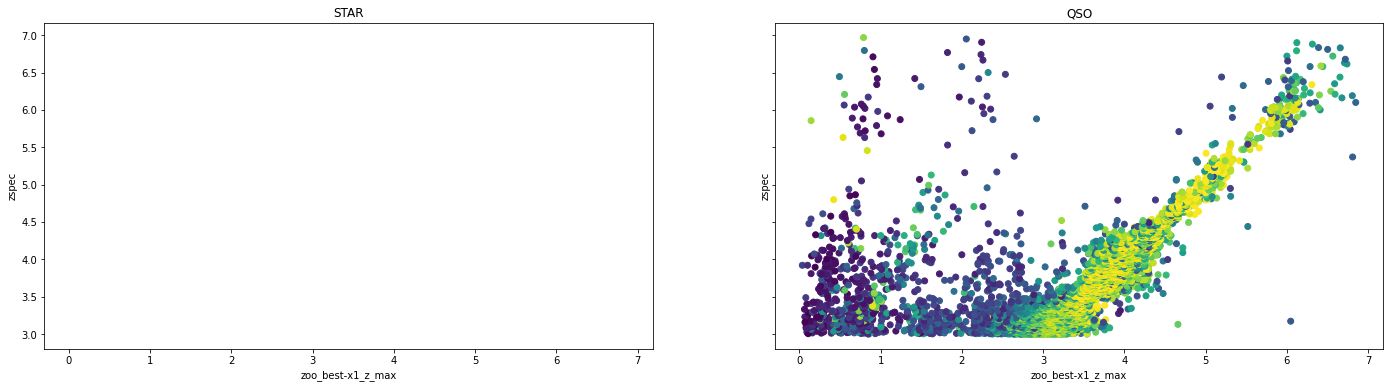

In [89]:
report_plots(df) #only zspec > 3 for Q and G

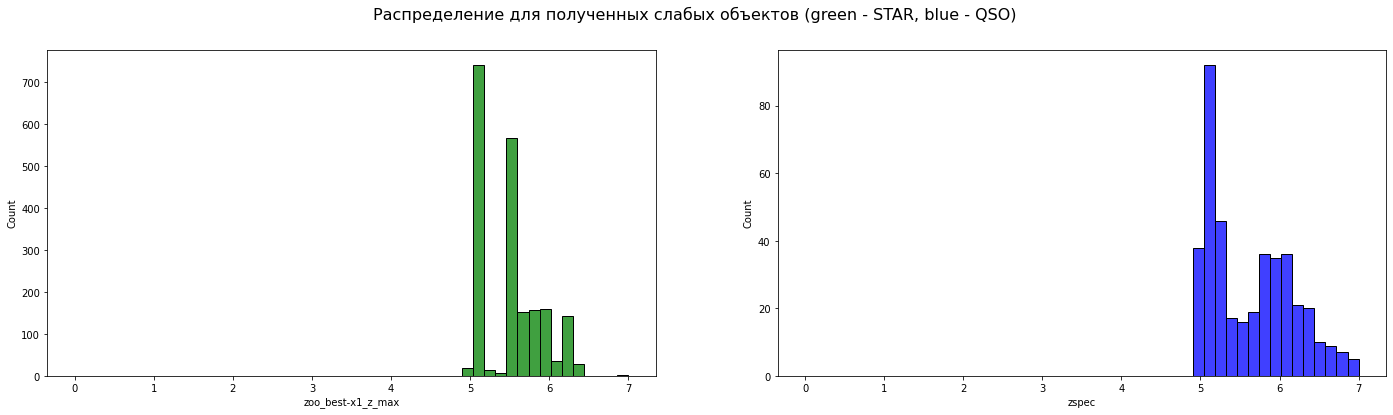

STAR 2020 
QSO 407 
GALAXY 0


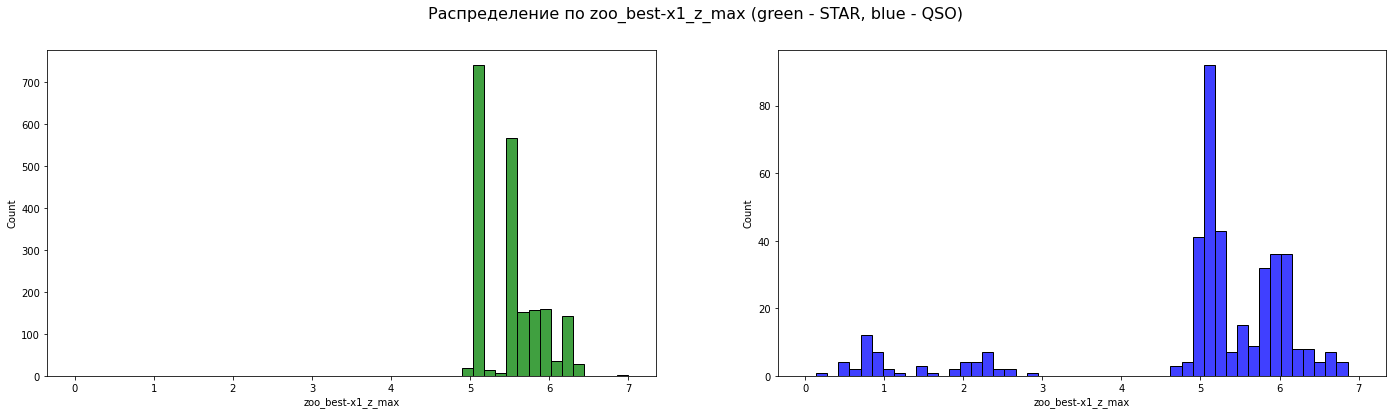

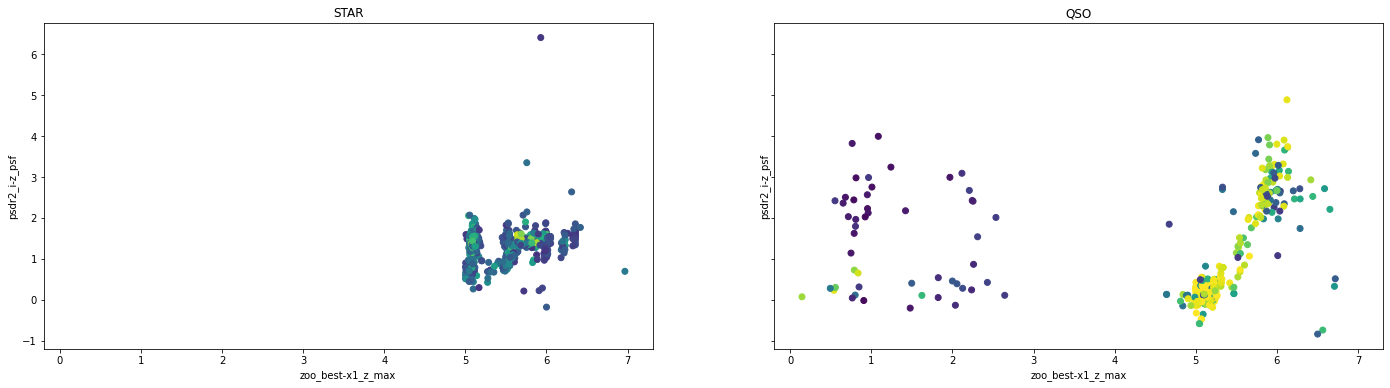

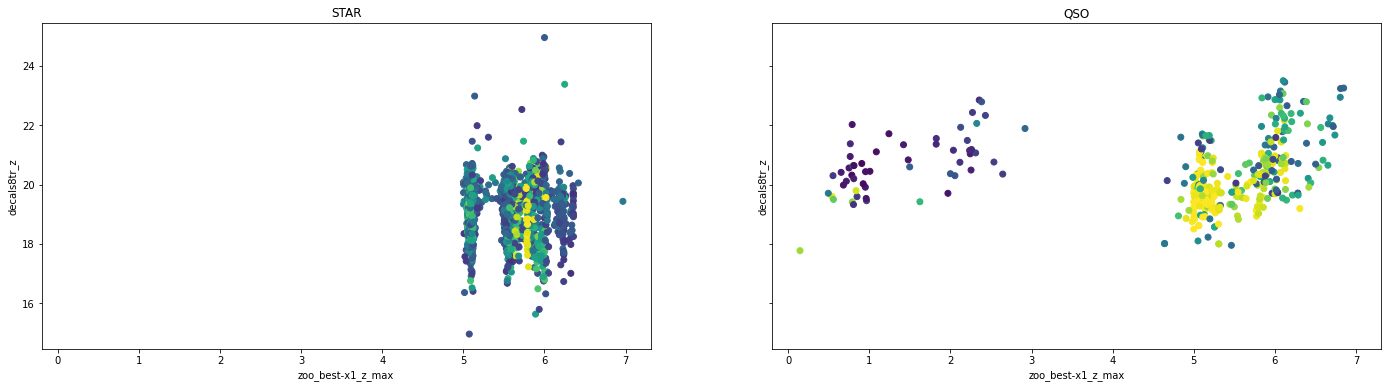

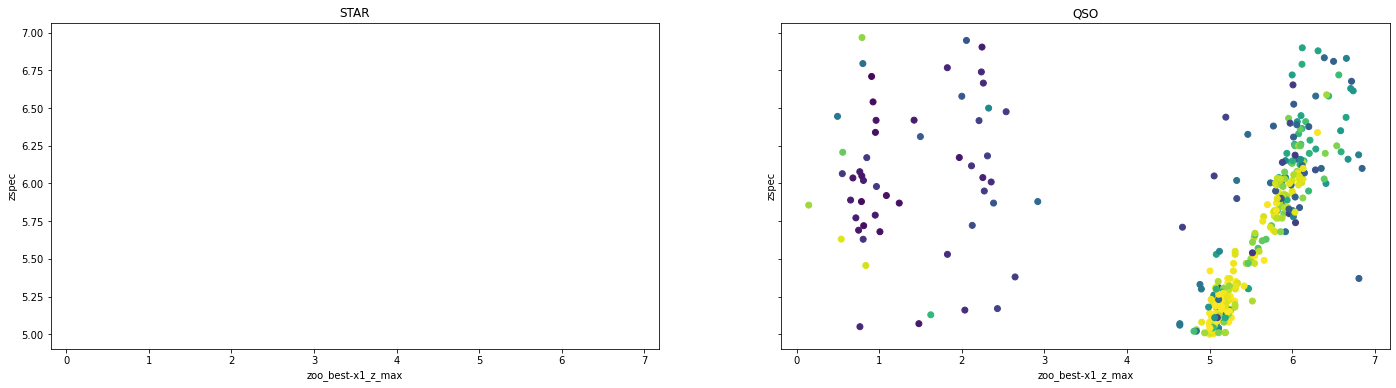

In [90]:
report_plots(df.loc[((df['zoo_best-x1_z_max']>5.) & 
 (df['zoo_best-x1_z_maxConf']>0.2) & (df['class'] == 1)) | ((df['class'] != 1) & (df['zspec']>5.))]) #zspec > 5 for Q and G

In [103]:
variants = ['not_j', 'j']
folds=[0, 1]
for fold in folds:
    for mod in variants:
        
        path = 'weak_true/models'+str(fold)+'/'+mod
        if create_path(path):
            raise Exception('Некуда писать')
            
        for overview in f[mod].keys():
            print(overview)
            
            df1 = df[df['fold'] == fold] 
            df1 = df1[f[mod][overview]+['class']].dropna()
            print(len(f[mod][overview]))
            
            X, y = df1[f[mod][overview]].values, df1['class'].values
            data, datat = data_preparation_bin(X, y, test_size=0.2, c=500000)
            print(data.shape, datat.shape)

            X1, y1 = data[:, :-1], data[:, -1].astype('int')
            X2, y2 = datat[:, :-1], datat[:, -1].astype('int')
            robust = RobustScaler()

            X_train_norm = robust.fit_transform(X1)
            X_test_norm = robust.transform(X2)
            y_train = y1
            y_test = y2

            obj = HPOpt(X_train_norm, y_train, cv=3)
            lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)
            print(lgb_opt)
            gb = lgb.LGBMClassifier( 
                                        **{'colsample_bytree': lgb_opt[0]['colsample_bytree'],
                                          'min_child_samples': lgb_opt[0]['min_child_samples']+1,
                                          #'min_child_weight': lgb_opt[0]['min_child_weight'],
                                          'num_leaves': lgb_opt[0]['num_leaves']+10,
                                          'bagging_freq':lgb_opt[0]['bagging_freq'],
                                          'n_estimators': 1000
                                          }
                                      )
            t = time()
            gb.fit(X_train_norm, y_train, eval_set=[(X_train_norm, y_train), (X_test_norm, y_test)],  **lgb_fit_params)
            print(time()-t)
            gb_test_acc = accuracy_score(y_test, gb.predict(X_test_norm))
            #acc.loc[mod, overview] = gb_test_acc
            print(gb_test_acc)
            joblib.dump(gb, path +'/model_'+overview+'.pkl')
            joblib.dump(f[mod][overview], path +'/features_'+overview+'.pkl')
            joblib.dump(robust, path +'/'+overview+'_robust_for_gb.pkl')


Директория weak_true/models0/not_j уже существует
sdssdr16+wise_decals8tr
30
(33183, 31) (8296, 31)
100%|██████████| 50/50 [02:14<00:00,  2.70s/trial, best loss: -0.9394268149353584]
({'bagging_freq': 2, 'colsample_bytree': 0.6220815380745892, 'min_child_samples': 5, 'num_leaves': 75}, <hyperopt.base.Trials object at 0x7f56c3a22b90>)
1.123715877532959
0.9375602700096431
psdr2+wise_decals8tr
29
(30019, 30) (7506, 30)
100%|██████████| 50/50 [01:50<00:00,  2.21s/trial, best loss: -0.9441687340948084]
({'bagging_freq': 3, 'colsample_bytree': 0.6566169893106368, 'min_child_samples': 77, 'num_leaves': 79}, <hyperopt.base.Trials object at 0x7f56c3958090>)
0.9673867225646973
0.9440447641886491
sdssdr16+all_decals8tr
39
(32956, 40) (8240, 40)
100%|██████████| 50/50 [02:47<00:00,  3.35s/trial, best loss: -0.9722963141210356]
({'bagging_freq': 6, 'colsample_bytree': 0.44079208925101543, 'min_child_samples': 45, 'num_leaves': 18}, <hyperopt.base.Trials object at 0x7f5492f5a290>)
0.9705209732055664